In [ ]:
!pip install kagglehub wordcloud nltk textblob

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
import re
import os
import kagglehub

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [ ]:
amazon_path = kagglehub.dataset_download(
    "PromptCloudHQ/amazon-reviews-unlocked-mobile-phones"
)

print("Amazon dataset path:", amazon_path)

Using Colab cache for faster access to the 'amazon-reviews-unlocked-mobile-phones' dataset.
Amazon dataset path: /kaggle/input/amazon-reviews-unlocked-mobile-phones


In [ ]:
amazon_files = os.listdir(amazon_path)
print(amazon_files)

amazon_df = pd.read_csv(os.path.join(amazon_path, amazon_files[0]))

amazon_df.head()

['Amazon_Unlocked_Mobile.csv']


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
amazon_df = amazon_df[['Reviews']]
amazon_df.dropna(inplace=True)

amazon_df.rename(columns={'Reviews': 'text'}, inplace=True)
amazon_df['brand'] = 'Amazon'

amazon_df.head()

,text,brand
0,I feel so LUCKY to have found this used (phone...,Amazon
1,"nice phone, nice up grade from my pantach revu...",Amazon
2,Very pleased,Amazon
3,It works good but it goes slow sometimes but i...,Amazon
4,Great phone to replace my lost phone. The only...,Amazon


In [ ]:
flipkart_path = kagglehub.dataset_download(
    "PromptCloudHQ/flipkart-products"
)

print("Flipkart dataset path:", flipkart_path)

100%|██████████| 5.50M/5.50M [00:00<00:00, 58.8MB/s]

Extracting files...


Flipkart dataset path: /root/.cache/kagglehub/datasets/PromptCloudHQ/flipkart-products/versions/1


In [ ]:
flipkart_files = os.listdir(flipkart_path)
print(flipkart_files)

flipkart_df = pd.read_csv(os.path.join(flipkart_path, flipkart_files[0]))

flipkart_df.head()

['flipkart_com-ecommerce_sample.csv']


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
flipkart_df = flipkart_df[['product_name', 'description']]
flipkart_df.dropna(inplace=True)

flipkart_df.rename(columns={'description': 'text'}, inplace=True)
flipkart_df['brand'] = 'Flipkart'

flipkart_df.head()

,product_name,text,brand
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Flipkart
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Flipkart
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,Flipkart
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Flipkart
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Flipkart


In [ ]:
data = pd.concat([amazon_df[['text','brand']],
                  flipkart_df[['text','brand']]])

data.reset_index(drop=True, inplace=True)

data.head()

,text,brand
0,I feel so LUCKY to have found this used (phone...,Amazon
1,"nice phone, nice up grade from my pantach revu...",Amazon
2,Very pleased,Amazon
3,It works good but it goes slow sometimes but i...,Amazon
4,Great phone to replace my lost phone. The only...,Amazon


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)

data.head()

,text,brand,clean_text
0,I feel so LUCKY to have found this used (phone...,Amazon,feel lucky found used phone us used hard phone...
1,"nice phone, nice up grade from my pantach revu...",Amazon,nice phone nice grade pantach revue clean set ...
2,Very pleased,Amazon,pleased
3,It works good but it goes slow sometimes but i...,Amazon,works good goes slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,Amazon,great phone replace lost phone thing volume bu...


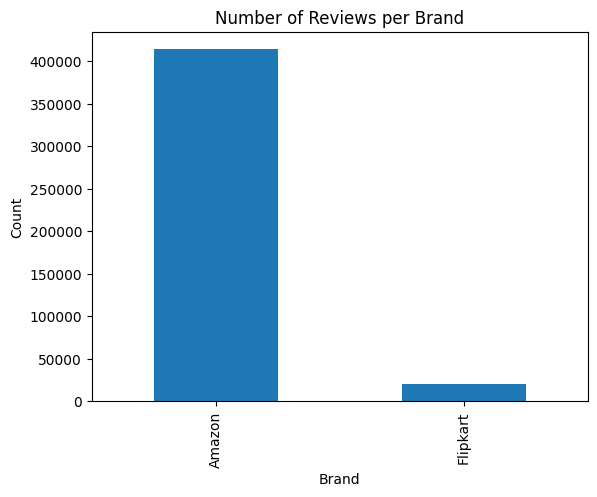

In [ ]:
data['brand'].value_counts().plot(kind='bar')
plt.title("Number of Reviews per Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

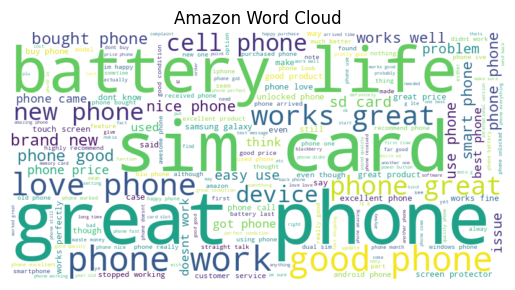

In [ ]:
amazon_text = " ".join(
    data[data.brand == 'Amazon']['clean_text']
)

wordcloud_amazon = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(amazon_text)

plt.imshow(wordcloud_amazon, interpolation='bilinear')
plt.axis('off')
plt.title("Amazon Word Cloud")
plt.show()

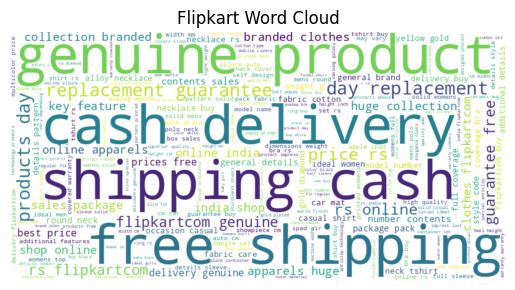

In [ ]:
flipkart_text = " ".join(
    data[data.brand == 'Flipkart']['clean_text']
)

wordcloud_flipkart = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(flipkart_text)

plt.imshow(wordcloud_flipkart, interpolation='bilinear')
plt.axis('off')
plt.title("Flipkart Word Cloud")
plt.show()

In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

data['sentiment'] = data['clean_text'].apply(get_sentiment)

data.head()

,text,brand,clean_text,sentiment
0,I feel so LUCKY to have found this used (phone...,Amazon,feel lucky found used phone us used hard phone...,Positive
1,"nice phone, nice up grade from my pantach revu...",Amazon,nice phone nice grade pantach revue clean set ...,Positive
2,Very pleased,Amazon,pleased,Positive
3,It works good but it goes slow sometimes but i...,Amazon,works good goes slow sometimes good phone love,Positive
4,Great phone to replace my lost phone. The only...,Amazon,great phone replace lost phone thing volume bu...,Positive


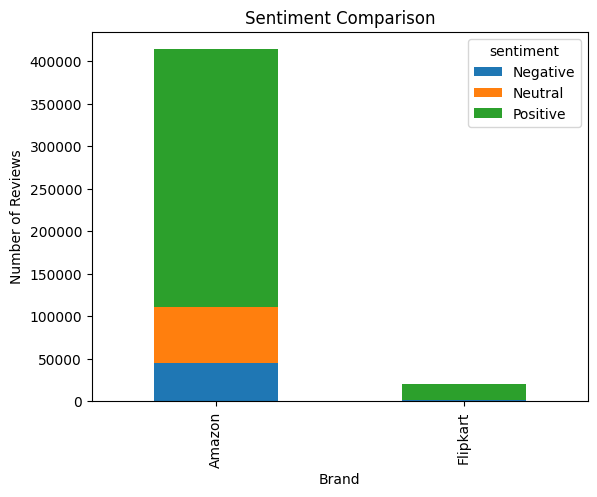

In [ ]:
sentiment_counts = data.groupby(
    ['brand', 'sentiment']
).size().unstack()

sentiment_counts.plot(kind='bar', stacked=True)
plt.title("Sentiment Comparison")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")
plt.show()

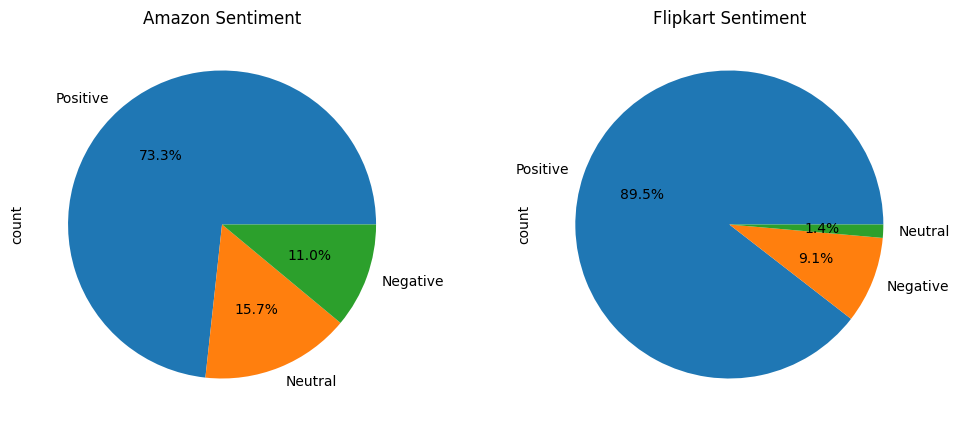

In [ ]:
amazon_sentiment = data[data.brand == 'Amazon']['sentiment'].value_counts()
flipkart_sentiment = data[data.brand == 'Flipkart']['sentiment'].value_counts()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
amazon_sentiment.plot(kind='pie', autopct='%1.1f%%')
plt.title("Amazon Sentiment")

plt.subplot(1,2,2)
flipkart_sentiment.plot(kind='pie', autopct='%1.1f%%')
plt.title("Flipkart Sentiment")

plt.show()